# Martin Zemko: Mean daily temperature
_1 November 2017_

In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_excel('mean-daily-temperature-fisher-ri.xlsx',
                     header=0,
                     skiprows=14,
                     parse_cols=1,
                     names=['Date', 'Temperature'],
                     converters= {'Date': pd.to_datetime})

## Základná štatistiska datového súboru

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
Date           1461 non-null datetime64[ns]
Temperature    1461 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.9 KB


In [4]:
dataframe.head()

,Date,Temperature
0,1988-01-01,-23.0
1,1988-01-02,-20.5
2,1988-01-03,-22.0
3,1988-01-04,-30.5
4,1988-01-05,-31.0


In [5]:
dataframe.describe()

,Temperature
count,1461.000000
mean,0.803320
std,15.154634
min,-35.000000
25%,-11.250000
50%,2.000000
75%,14.500000
max,27.000000


## Prevzorkovanie časovej rady

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


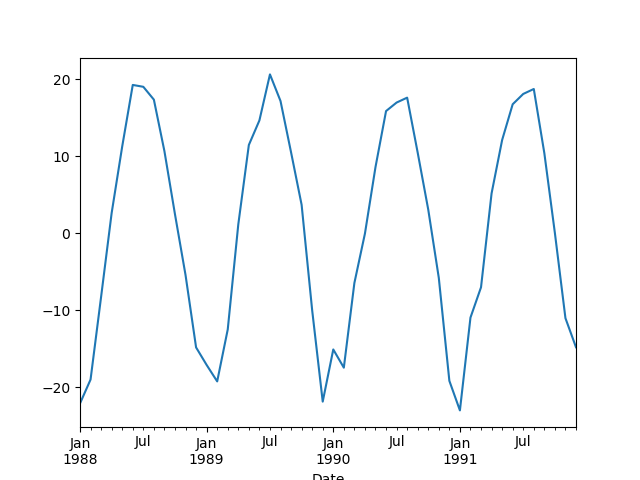

In [7]:
series = dataframe.set_index(['Date'])['Temperature']
series.resample('1M').mean().plot()

## Lineárna regresia

In [8]:
import statsmodels.api as sm

C:\Users\Martin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
import numpy as np

In [28]:
dataframe['Y'] = dataframe['Date'].apply(lambda x: x.year - 1988)
for m in range(1, 13):
    dataframe['M'+str(m)] = dataframe['Date'].apply(lambda x: 1 if x.month == m else 0)
X = dataframe.as_matrix()[:, 2:15]
X = X.astype(np.int32)
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [3, 0, 0, ..., 0, 0, 1],
       [3, 0, 0, ..., 0, 0, 1],
       [3, 0, 0, ..., 0, 0, 1]])

In [29]:
y = dataframe['Temperature']

In [30]:
model = sm.OLS(y, X)
results = model.fit()

In [31]:
results.params.values

array([  0.10503058, -19.51198136, -16.86278883,  -8.72246523,
         2.07787079,  10.7186638 ,  16.50120412,  18.54971219,
        17.58801864,  10.36537079,   2.15938961,  -8.23296254, -17.84786846])

In [32]:
dataframe['Fit'] = np.dot(X, results.params.values)

<IPython.core.display.Javascript object>


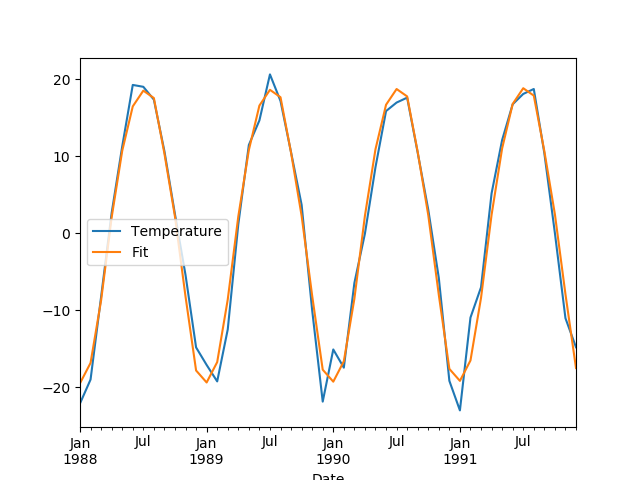

In [33]:
series = dataframe.set_index(['Date'])[['Temperature', 'Fit']]
series.resample('1M').mean().plot()